Observation 1: Among the surviving mice, only Capomulin reduced the average tumor size.
Observation 2: Among the surviving mice, Capomulin showed the smallest increase in the number of metastatic sites. 
Observation 3: Of the four treatments, Capomulin had the best survival rate over the 45 day trial period. 

In [36]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

In [37]:
# Read csv files to DataFrames
file_path_clinical = "raw_data/clinicaltrial_data.csv"
file_path_mouse = "raw_data/mouse_drug_data.csv"

clinical_df = pd.read_csv(file_path_clinical)
mouse_df = pd.read_csv(file_path_mouse)

# Replace Mouse ID with drug name
mouse_ID = {}
for x,y in zip(mouse_df["Drug"],mouse_df["Mouse ID"]):
    mouse_ID[y] = x
clinical_df["Drug"] = clinical_df["Mouse ID"].replace(mouse_ID)

# Groupby Drug and Timepoint
clinical_group = clinical_df.groupby(["Drug","Timepoint"])

# Create a new DataFrame of the mean and sem values for the tumor volumen and metastatic sites, and for the number of living mice
new_df = pd.DataFrame({"Tumor Volume Mean":clinical_group["Tumor Volume (mm3)"].mean(),
                      "Tumor Volume SEM": clinical_group["Tumor Volume (mm3)"].sem(),
                      "Metastatic Sites Mean": clinical_group["Metastatic Sites"].mean(),
                      "Metastatic Sites SEM": clinical_group["Metastatic Sites"].sem(),
                      "Alive Count": clinical_group["Metastatic Sites"].count()})

# Store all of the values to be plotted for each drug in a dictionary called stat_dict
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
stat_dict = {}
for drug in drugs:
    stat_dict[drug+"_TV_mean"] = new_df.loc[drug,"Tumor Volume Mean"]
    stat_dict[drug+"_TV_sem"] = new_df.loc[drug,"Tumor Volume SEM"]
    stat_dict[drug+"_MS_mean"] = new_df.loc[drug,"Metastatic Sites Mean"]
    stat_dict[drug+"_MS_sem"] = new_df.loc[drug,"Metastatic Sites SEM"]
    stat_dict[drug+"_AC"] = new_df.loc[drug,"Alive Count"]

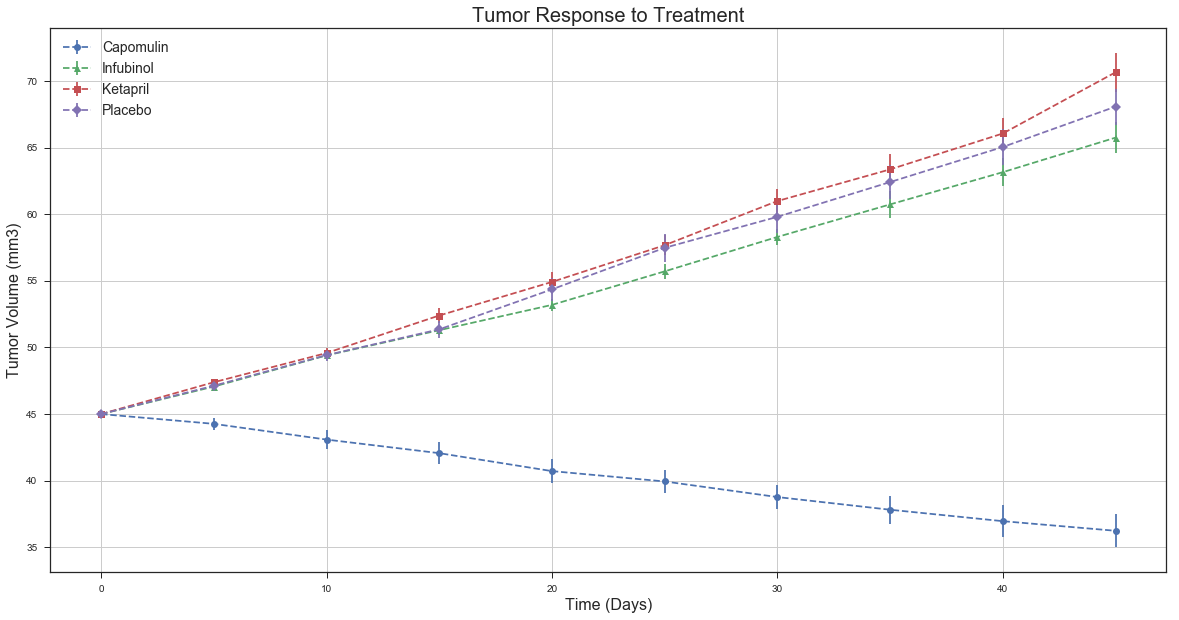

In [38]:
# Tumor Response to Treatment
x_values = [0,5,10,15,20,25,30,35,40,45]
markers = ['o','^','s','D']
plt.figure(figsize=(20,10))
# loop through stat_dict for the data on tumor mean size
for drug, marker in zip(drugs,markers):
    plt.errorbar(x_values, stat_dict[drug+"_TV_mean"], stat_dict[drug+"_TV_sem"], fmt=marker, ls='dashed', label=drug)
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=16)
plt.ylabel("Tumor Volume (mm3)", fontsize=16)
plt.legend(loc="upper left",fontsize=14)
plt.grid(linestyle='-')
plt.show()

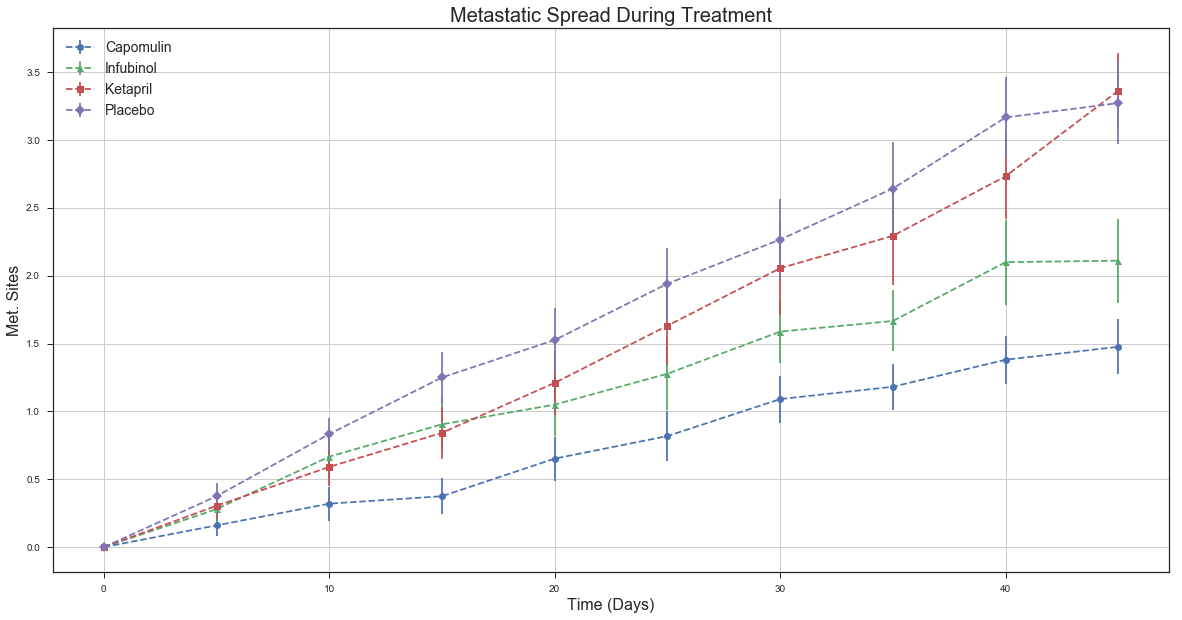

In [49]:
# Metastatic Spread During Treatment
plt.figure(figsize=(20,10))
# Loop through stat_dict for the data on the mean number of metastatic sites
for drug, marker in zip(drugs,markers):
    plt.errorbar(x_values, stat_dict[drug+"_MS_mean"], stat_dict[drug+"_MS_sem"], fmt=marker, capsize=10, ls='dashed',label=drug)
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=16)
plt.ylabel("Met. Sites", fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle='-')
plt.show()

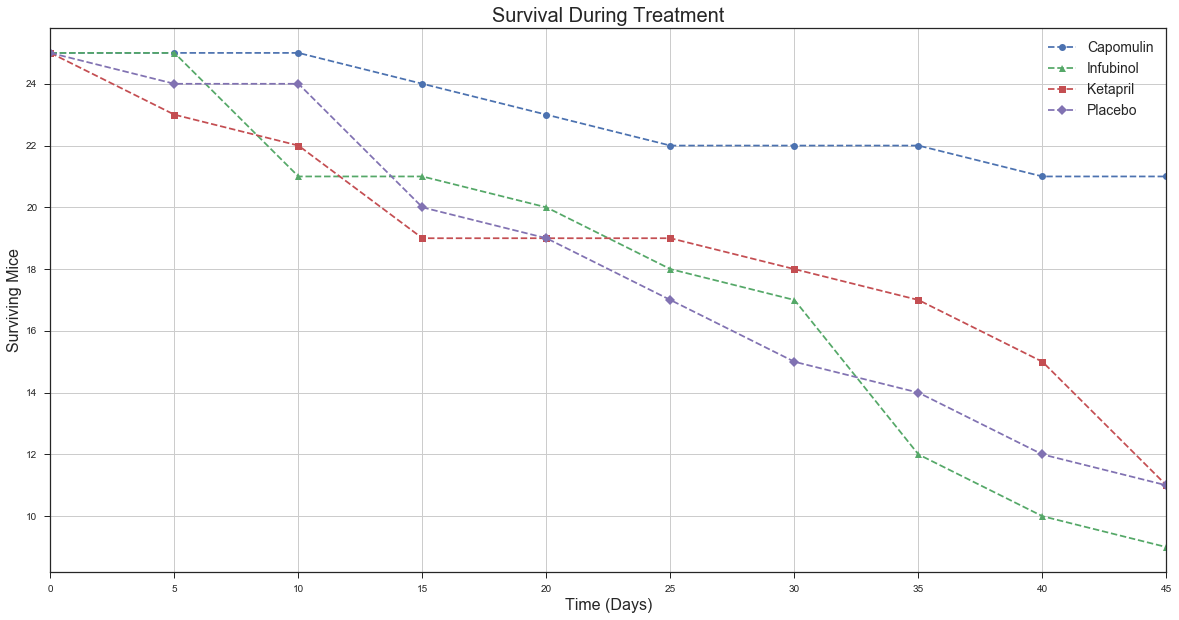

In [42]:
# Survival During Treatment
plt.figure(figsize=(20,10))
# Loop through the stat_dict for the number of living mice
for drug, marker in zip(drugs,markers):
    plt.plot(x_values, stat_dict[drug+"_AC"], marker=marker,ls='dashed', label=drug)
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=16)
plt.ylabel("Surviving Mice", fontsize=16)
plt.xlim(0,45)
plt.legend(fontsize=14)
plt.grid(linestyle='-')
plt.show()

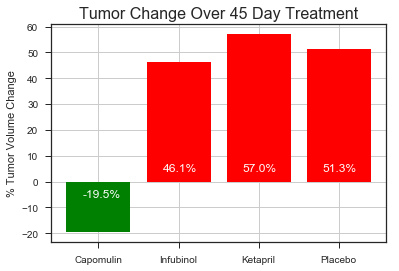

In [41]:
# Total % tumor volume change

# Find the % tumor volume change across 45 days
volume_change = []
for drug in drugs:
    volume_change.append((new_df.loc[(drug,45),"Tumor Volume Mean"]-new_df.loc[(drug,0),"Tumor Volume Mean"])/new_df.loc[(drug,0),"Tumor Volume Mean"]*100)

# Indicate tumor growth as red and tumor reduction as green
colors = []
for v_change in volume_change:
    if v_change > 0:
        colors.append("red")
    else:
        colors.append("green")
        
# Make bar graph
plt.bar(drugs,volume_change,color=colors) 
plt.title("Tumor Change Over 45 Day Treatment",fontsize=16)
plt.ylabel("% Tumor Volume Change")
plt.grid(linestyle='-')

# Place percentage values in bars
for x,y in zip(np.arange(len(drugs)),volume_change):
    if y > 0:
        plt.text((x-0.2),4,str(round(y,1))+"%",color="white")
    else:
        plt.text((x-0.2),-6,str(round(y,1))+"%",color="white")

plt.show()